In [1]:
from TransformingCity import TransformingCity, LandUseViewer, PopulationViewer

import numpy as np
import matplotlib.pyplot as plt
import thinkplot

%matplotlib inline
from matplotlib import rc
rc('animation', html='html5')

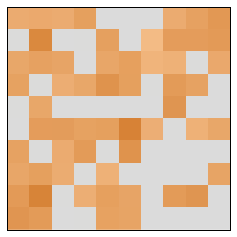

In [12]:
# Testing if random seeds for initial parameters remove some variation
city = TransformingCity(10, random_seed=17)
city.step()
city.array = city.pop_count # default array is landuse
viewer = PopulationViewer(city)
anim = viewer.animate()
rent_start1 = city.rent_start
rent_end1 = city.rent_current

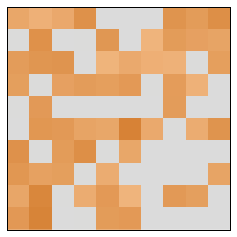

In [13]:
# Testing if random seeds for initial parameters remove some variation
city = TransformingCity(10, random_seed=17)
city.step()
city.array = city.pop_count # default array is landuse
viewer = PopulationViewer(city)
anim = viewer.animate()
rent_start2 = city.rent_start
rent_end2 = city.rent_current

In [17]:
try:
    np.testing.assert_array_equal(rent_start1, rent_start2)
    print("Rent Initialization is identical for case one and case two")
except AssertionError:
    print("JK")

Rent Initialization is identical for case one and case two


In [19]:
try:
    np.testing.assert_array_equal(rent_end1, rent_end2)
    print("Rent after sim is identical for diff. random seeds?  That can't be right...")
except AssertionError:
    print("Rent after sim is different, which is good!")

Rent after sim is different, which is good!


### Exploring questions related to subsidization in a city and affect on creative space

change in % of creative space in unsubsidized city: -8.6 %
change in % of creative space in 50% subsidized city: 1.7 %


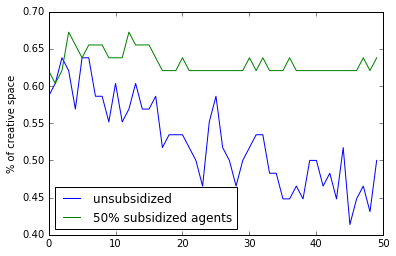

In [23]:
city = TransformingCity(10, random_seed=17)
sub_city = TransformingCity(10, p_subsidized=0.5, avg_rent=12000, random_seed=17)

for i in range(50):
    city.step()
    sub_city.step()

print("change in % of creative space in unsubsidized city: {0:.1f} %".format(
        (city.p_creative_space_history[-1] - city.p_creative_space_history[0])*100))
print("change in % of creative space in 50% subsidized city: {0:.1f} %".format(
        (sub_city.p_creative_space_history[-1] - sub_city.p_creative_space_history[0])*100))
plt.hold('on')
plt.plot(city.p_creative_space_history, label='unsubsidized')
plt.plot(sub_city.p_creative_space_history, label='50% subsidized agents')
plt.ylabel('% of creative space')
plt.legend(loc='best')
plt.show()


This visualization got really noisy, and there wasn't a lot of signal whether subsidization or unsubidization would result in more creative space over a number of time steps.
I sometimes noticed an upward trend in both cases though, of more creative spaces in the city.  This can represent a diffusion of creative agents, into areas which have rents which suit them.

change in % of creative space in unsubsidized city: -8.6 %
change in % of creative space in 50% subsidized city: -3.4 %


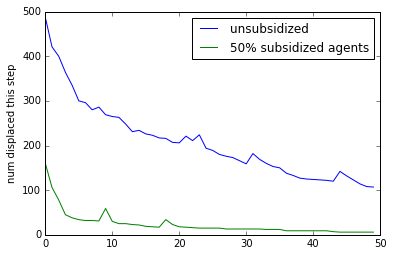

In [27]:
city = TransformingCity(10, avg_rent=12000, random_seed=17)
sub_city = TransformingCity(10, avg_rent=12000, p_subsidized=0.5, random_seed=17)

for i in range(50):
    city.step()
    sub_city.step()

print("change in % of creative space in unsubsidized city: {0:.1f} %".format(
        (city.p_creative_space_history[-1] - city.p_creative_space_history[0])*100))
print("change in % of creative space in 50% subsidized city: {0:.1f} %".format(
        (sub_city.p_creative_space_history[-1] - sub_city.p_creative_space_history[0])*100))
plt.hold('on')
plt.plot(city.num_displaced_this_step_history, label='unsubsidized')
plt.plot(sub_city.num_displaced_this_step_history, label='50% subsidized agents')
plt.ylabel('num displaced this step')
plt.legend(loc='best')
plt.show()

After talking with Allen, I'm planning on representing the results of the timeseries with a single number, so that over multiple runs, I can average a single number to find a trend.

### Investigating Creative Space Changes for varying levels of subsidization, over many trials

In [28]:
def creative_space_subnosub_one_run(p_subsidized):
    city = TransformingCity(10, p_subsidized=p_subsidized, avg_rent=12000, random_seed=17)
    for i in range(50):
        city.step()
    delta_p_creative_space = city.p_creative_space_history[-1] - city.p_creative_space_history[0]
    return delta_p_creative_space

print("change in % of creative space in 0% subsidized city: {0:.1f} %".format(
        creative_space_subnosub_one_run(0.0) * 100))

change in % of creative space in 0% subsidized city: -8.6 %


In [29]:
# run your own experiments to get a resmat
sub_levels = 5
p_subsidized_vals = np.linspace(0, 0.90, sub_levels)
n_trials = 1000
resmat = np.zeros((sub_levels, n_trials))
for i, p_subsidized in enumerate(p_subsidized_vals):
    for j in range(n_trials):
        resmat[i,j] = creative_space_subnosub_one_run(p_subsidized)
        

# preload a resmat
# resmat = np.load('resmat_start_rent_12000avgrent_codeversion2_seed17_1000_trials.npy')

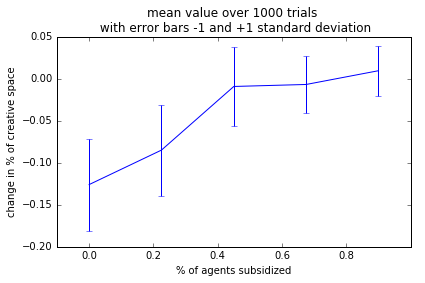

In [30]:
plt.errorbar(p_subsidized_vals, np.mean(resmat, axis=1), yerr=np.std(resmat, axis=1))
plt.title('mean value over 1000 trials \n with error bars -1 and +1 standard deviation')
plt.xlabel('% of agents subsidized')
plt.ylabel('change in % of creative space')
plt.xlim([-0.1, 1.0])
plt.tight_layout()
plt.savefig('p_subsidized_creative_space_errbar_stdev.png', bbox_inches='tight')

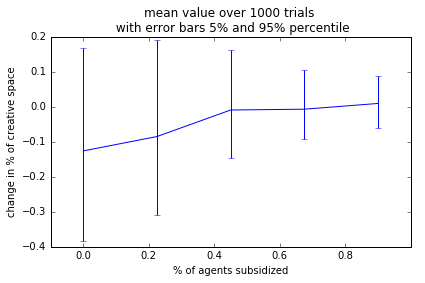

In [31]:
plt.errorbar(p_subsidized_vals, np.mean(resmat, axis=1),
             yerr=[np.percentile(resmat, 0.05, axis=1), np.percentile(resmat, 0.95, axis=1)])
plt.title('mean value over 1000 trials \n with error bars 5% and 95% percentile')
plt.xlabel('% of agents subsidized')
plt.ylabel('change in % of creative space')
plt.xlim([-0.1, 1.0])
plt.tight_layout()
plt.savefig('p_subsidized_creative_space_errbar_5_95.png', bbox_inches='tight')

In [32]:
resmat.shape

(5, 1000)

In [33]:
np.save('resmat_start_rent_12000avgrent_codeversion2_seed17_1000_trials.npy', resmat)